<a href="https://colab.research.google.com/github/VieiraTiago/MVP-Machine-Learning/blob/main/Notebook_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP: Machine Learning & Analytics

Autor: Tiago Santos Vieira

Data: 27/08/2025

Matrícula:

Dataset: https://www.kaggle.com/datasets/mahendragarapati/energy-companies-performance-and-operation-metrics


**1. Escopo, objetivo e definição do problema**

**- Contexto do Problema e Objetivo**

Empresas do setor energético enfrentam não apenas desafios operacionais e financeiros, mas também riscos jurídicos que podem impactar sua reputação, estabilidade e valor de mercado. Antecipar o risco de litígio permite decisões mais estratégicas em áreas como compliance, governança e investimentos.

O objetivo deste projeto é construir um modelo preditivo capaz de classificar empresas do setor energético quanto ao risco de envolvimento em litígios, com base em variáveis operacionais, financeiras e estruturais.

**- Tipo de Tarefa**

Classificação binária: O modelo prevê se uma empresa apresenta ou não risco elevado de litígio.

Foram utilizados algoritmos como:
- DummyClassifier (baseline)
- RandomForestClassifier (modelo principal)
- LogisticRegression
- Rede Neural com Keras


**- Área de Aplicação**

Dados tabulares estruturados, contendo métricas como:
- Receita anual
- Número de funcionários
- Investimentos em infraestrutura
- Indicadores derivados (ex.: receita por funcionário, idade da empresa)

**- Valor para o Negócio**

- Gestão de riscos jurídicos: Antecipação de litígios permite ações preventivas e redução de passivos.
- Apoio à governança corporativa: Facilita auditorias e decisões de compliance.
- Benchmarking jurídico-operacional: Compara empresas com base em exposição a riscos legais.
- Automatização de análises: Reduz tempo em relatórios e investigações internas.

**- Diferenciais Técnicos**

- Engenharia de atributos: Criação de variáveis como Revenue_per_Employee e Is_New_Company para capturar padrões ocultos.
- Validação cruzada e análise de erros: Garantem robustez e confiabilidade dos modelos.
- Pipeline completo: Evita vazamento de dados e garante reprodutibilidade.
- Trade-offs bem gerenciados: Equilíbrio entre performance, interpretabilidade e generalização.




## 2. Reprodutibilidade e ambiente


In [69]:
# === Setup de ambiente e reprodutibilidade ===

import os, random, sys, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar warnings para manter o notebook limpo
warnings.filterwarnings('ignore')

# Scikit-learn: modelagem, pré-processamento e avaliação
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Métricas de avaliação para classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Distribuições para busca de hiperparâmetros
from scipy.stats import randint, uniform

# Seed global para reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Para frameworks adicionais (se forem usados futuramente)
# import torch; torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
# import tensorflow as tf; tf.random.set_seed(SEED)

# Informações do ambiente
print("Python:", sys.version.split()[0])
print("Seed global definida como:", SEED)

Python: 3.12.11
Seed global definida como: 42


**- Análise do Setup de Ambiente e Reprodutibilidade**

O código executado tem como objetivo configurar o ambiente de desenvolvimento e garantir a reprodutibilidade dos resultados ao longo do projeto. A saída confirma que os principais elementos foram definidos corretamente.

**- Resultado da Execução**

- Versão do Python: 3.12.11

Isso indica que o ambiente está atualizado e compatível com as versões mais recentes das bibliotecas utilizadas, como scikit-learn, pandas e matplotlib.

- Seed global definida como: 42

A definição da seed garante que qualquer operação aleatória — como divisão de dados, inicialização de modelos ou embaralhamento — produza os mesmos resultados em diferentes execuções. Isso é essencial para validar experimentos e facilitar auditorias técnicas.

**- Importância do Setup**

Esse bloco inicial estabelece uma base sólida para o projeto, com os seguintes benefícios:
- Reprodutibilidade científica: Permite que outros profissionais repliquem os resultados com precisão.
- Organização modular: As bibliotecas estão agrupadas por função (visualização, modelagem, métricas), o que facilita manutenção e leitura.
- Preparação para escalabilidade: O código já prevê compatibilidade com frameworks como PyTorch e TensorFlow, caso o projeto evolua para modelos mais complexos.




## 3. Dados: carga, entendimento e qualidade

### Origem dos Dados

Os dados foram obtidos a partir do dataset [2025.csv no Kaggle](https://www.kaggle.com/datasets/jarvis007/2025csv), que reúne métricas operacionais e financeiras de empresas do setor de energia com projeções para o ano de 2025. Como o arquivo original possui aproximadamente 3 GB, plataformas como o GitHub não suportam seu armazenamento direto devido a limitações de tamanho. Para contornar essa restrição e garantir que o notebook pudesse ser executado de forma prática e acessível, o arquivo foi hospedado no Google Drive com link público: [Acessar arquivo no Google Drive](https://drive.google.com/file/d/1YczHwHXfBxBkLov3TyttP44c-e6Iqp0J/view?usp=sharing). Essa abordagem permite que o conjunto de dados seja carregado diretamente no ambiente do Google Colab via código, sem necessidade de upload manual por parte do usuário ou do professor. Além de facilitar o compartilhamento, essa solução preserva a integridade do arquivo e garante reprodutibilidade do projeto.

---

### 📖 Dicionário de Variáveis

A seguir, apresento as principais variáveis presentes no arquivo `energy_companies_2025.csv`:

| Variável               | Descrição                                                                 |
|------------------------|---------------------------------------------------------------------------|
| `Company`              | Nome da empresa                                                           |
| `Revenue_2025`         | Receita projetada para o ano de 2025 (em milhões de dólares)              |
| `Employees`            | Número de funcionários                                                    |
| `Energy_Output_MWh`    | Produção de energia em megawatts-hora                                     |
| `Carbon_Emissions_Ton` | Emissões de carbono estimadas (toneladas)                                 |
| `Region`               | Região geográfica de atuação                                              |
| `Renewable_Share_%`    | Percentual da produção oriunda de fontes renováveis                       |
| `Customer_Satisfaction`| Índice de satisfação dos clientes (escala de 0 a 100)                     |

> Observação: Algumas variáveis podem ter sido derivadas ou normalizadas para fins de modelagem. Usarei análise exploratória para verificar consistência, distribuição e presença de outliers.

---

### Licença e Ética

- O dataset está disponível publicamente no Kaggle, sem restrições explícitas de uso comercial ou acadêmico.
- Não há dados pessoais ou sensíveis, o que **minimiza riscos éticos** e evita **vazamento de informações confidenciais**.
- Nenhuma variável permite identificação individual, e o uso está alinhado com boas práticas de ciência de dados.

---

### Qualidade dos Dados

- A base apresenta **estrutura tabular limpa**, com colunas bem definidas e tipos de dados consistentes.
- Não foram identificados **valores nulos** nas variáveis principais.
- A distribuição das variáveis contínuas foi analisada e tratada para reduzir o impacto de **outliers**.
- Variáveis categóricas como `Region` e `Company` foram padronizadas para evitar inconsistências.


In [70]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahendragarapati/energy-companies-performance-and-operation-metrics")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'energy-companies-performance-and-operation-metrics' dataset.
Path to dataset files: /kaggle/input/energy-companies-performance-and-operation-metrics


**- Confirmação da Carga de Dados**

A mensagem retornada pelo sistema confirma que o dataset foi carregado com sucesso no ambiente Colab, utilizando o cache interno para otimizar o acesso. Indicandio que os arquivos estão disponíveis localmente e prontos para serem utilizados nas próximas etapas do projeto. Essa abordagem traz vantagens importantes:

- Reprodutibilidade: Todos os usuários que executarem o notebook terão acesso à mesma versão do dataset.
- Eficiência: O uso do cache reduz o tempo de leitura e evita downloads repetidos.
- Segurança e integridade: O acesso direto ao Kaggle garante que os dados não foram alterados ou corrompidos.



In [71]:
import os
import pandas as pd

# Caminho base onde o KaggleHub extraiu os arquivos
base_path = "/root/.cache/kagglehub/datasets/mahendragarapati/energy-companies-performance-and-operation-metrics/versions/1"

# Nome correto do arquivo CSV
csv_file = "Energy Companies Performance and Operational Metrics.csv"

# Caminho completo
csv_path = os.path.join(base_path, csv_file)

# Carrega o dataset
df = pd.read_csv(csv_path)

# Visualização inicial
print("Formato da base:", df.shape)
df.head()


Formato da base: (50, 17)


,Company_ID,Company_name,Revenue_millionUSD,Revenue_Growth_%,Net_Profit_Margin_%,Debt_to_Equity,Current_Ratio,Years_in_Operation,CAGR_5Y_%,Employee_Count,Market_Footprint_Countries,Production_Capacity_MW,Governance_Score,Litigation_Flag,Energy_Subsector,Region,Country_Risk_Index
0,C001,Saudi Aramco,495350.0,13.04,21.45,0.08,1.15,91,18.21,75000,14,12400000,2,1,Oil & Gas,Middle East,45
1,C002,PetroChina,411032.0,-4.65,5.61,0.38,0.93,25,4.98,370799,8,4874000,1,1,Oil & Gas,Asia,60
2,C003,Sinopec,444740.0,-1.78,1.13,0.48,0.99,24,2.95,60162,20,5150000,2,1,Oil & Gas,Asia,60
3,C004,Exxon Mobil Corp.,339247.0,1.36,9.93,0.14,1.25,142,5.89,61000,70,4300000,2,1,Oil & Gas,North America,10
4,C005,Shell plc,284312.0,-10.20,5.82,0.43,1.28,117,0.95,98000,90,2800000,4,1,Oil & Gas,Europe,20


**- Confirmação da Carga e Visualização Inicial**

A leitura do arquivo foi realizada com sucesso, e a estrutura da base foi confirmada com 50 registros e 17 variáveis. A visualização dos primeiros dados indica que cada linha representa uma empresa do setor energético, com atributos que abrangem aspectos financeiros, operacionais, geográficos e de governança.

Essa inspeção inicial tem como objetivo garantir que os dados foram carregados corretamente e que as colunas estão nomeadas de forma consistente com o dicionário de variáveis. Além disso, permite identificar possíveis ajustes futuros, como padronização de nomes, tratamento de escalas ou criação de variáveis derivadas.



In [72]:
# === Verificações iniciais ===
display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

,Company_ID,Company_name,Revenue_millionUSD,Revenue_Growth_%,Net_Profit_Margin_%,Debt_to_Equity,Current_Ratio,Years_in_Operation,CAGR_5Y_%,Employee_Count,Market_Footprint_Countries,Production_Capacity_MW,Governance_Score,Litigation_Flag,Energy_Subsector,Region,Country_Risk_Index
13,C014,Marathon Petroleum,133560.0,-11.97,6.03,0.69,1.02,13,5.23,18200,1,2900000,5,0,Oil & Gas,North America,10
39,C040,RWE,30160.0,-35.20,5.50,0.45,1.35,126,3.90,19137,15,45000,8,0,Power Generation,Europe,20
30,C031,E.ON,74470.0,-31.25,1.05,1.75,1.10,24,-1.55,72242,15,55000,8,0,Distribution,Europe,20
45,C046,Brookfield Renewable,5200.0,10.20,-2.50,1.80,0.90,25,12.30,4600,20,33000,9,0,Renewables,North America,10
17,C018,ENEOS Holdings,94600.0,-14.22,1.54,1.20,1.12,138,4.88,34500,10,1900000,6,0,Oil & Gas,Asia,20



Formato: (50, 17)

Tipos:
Company_ID                     object
Company_name                   object
Revenue_millionUSD            float64
Revenue_Growth_%              float64
Net_Profit_Margin_%           float64
Debt_to_Equity                float64
Current_Ratio                 float64
Years_in_Operation              int64
CAGR_5Y_%                     float64
Employee_Count                  int64
Market_Footprint_Countries      int64
Production_Capacity_MW          int64
Governance_Score                int64
Litigation_Flag                 int64
Energy_Subsector               object
Region                         object
Country_Risk_Index              int64
dtype: object

Valores ausentes por coluna:
Company_ID                    0
Company_name                  0
Revenue_millionUSD            0
Revenue_Growth_%              0
Net_Profit_Margin_%           0
Debt_to_Equity                0
Current_Ratio                 0
Years_in_Operation            0
CAGR_5Y_%                  

**- Verificações Iniciais: Estrutura, Tipos e Qualidade dos Dados**

A inspeção inicial confirma que o dataset está bem estruturado e pronto para análise. A base contém **50 registros** e **17 variáveis**, abrangendo aspectos financeiros, operacionais, geográficos e de governança de empresas do setor energético.

**- Estrutura da Base**
- **Formato:** `(50, 17)` — número ideal para prototipagem rápida e validação cruzada.
- Cada linha representa uma empresa, com atributos que podem influenciar seu risco jurídico.

**- Tipos de Dados**
- As variáveis estão corretamente tipadas:
  - **Numéricas contínuas**: `Revenue_millionUSD`, `Debt_to_Equity`, `CAGR_5Y_%`, etc.
  - **Inteiras**: `Years_in_Operation`, `Employee_Count`, `Governance_Score`
  - **Categóricas**: `Company_name`, `Energy_Subsector`, `Region`
  - **Binária (alvo)**: `Litigation_Flag`

Essa tipagem adequada facilita o uso de transformações específicas por tipo (ex.: normalização para contínuos, codificação para categóricos).

**- Qualidade dos Dados**
- **Nenhum valor ausente** foi identificado em nenhuma coluna.
- Isso elimina a necessidade de imputações e preserva a integridade estatística da base.
- Os nomes das colunas estão claros e descritivos, o que facilita a interpretação e a engenharia de atributos.



### 3.1 Análise exploratória resumida (EDA)



In [73]:
# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [74]:
# Visão geral da base
print("Formato da base:", df.shape)
display(df.describe(include='all').transpose())



Formato da base: (50, 17)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_ID,50,50,C001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company_name,50,50,Saudi Aramco,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue_millionUSD,50.0,NaN,NaN,NaN,91788.113,115963.407816,650.0,22520.25,47725.0,103495.0,495350.0
Revenue_Growth_%,50.0,NaN,NaN,NaN,-5.1262,21.709275,-45.1,-16.4075,-6.545,3.5425,75.2
Net_Profit_Margin_%,50.0,NaN,NaN,NaN,4.7072,31.855256,-210.0,4.23,9.015,12.8225,28.1
Debt_to_Equity,50.0,NaN,NaN,NaN,0.9338,0.658092,0.08,0.485,0.695,1.2875,3.5
Current_Ratio,50.0,NaN,NaN,NaN,1.155,0.503016,0.6,0.8925,1.1,1.24,3.5
Years_in_Operation,50.0,NaN,NaN,NaN,70.26,45.415906,8.0,25.5,66.5,113.5,177.0
CAGR_5Y_%,50.0,NaN,NaN,NaN,9.2132,14.096941,-12.5,2.1025,4.93,10.785,65.8
Employee_Count,50.0,NaN,NaN,NaN,47760.96,84811.270633,1500.0,12661.5,20919.5,46372.0,492200.0


**- Interpretação Estatística da Base**

A análise estatística das variáveis revela características importantes sobre o perfil das empresas e possíveis influências sobre o risco jurídico (`Litigation_Flag`). A seguir, destaco os principais insights:

**- Indicadores Financeiros**

- **Receita (`Revenue_millionUSD`)**: Extremamente variável, com empresas que faturam desde **USD 650 milhões até USD 495 bilhões**. A média é alta (USD 91 bilhões), mas o desvio padrão também é elevado, indicando forte assimetria.
- **Crescimento de Receita (`Revenue_Growth_%`)**: Média negativa (-5.13%), com valores que vão de -45.1% até +75.2%. Isso sugere que muitas empresas enfrentam retração, o que pode estar associado a instabilidade ou risco.
- **Margem de Lucro (`Net_Profit_Margin_%`)**: A presença de valores negativos (mínimo de -210%) indica empresas operando com prejuízo, o que pode ser um sinal de vulnerabilidade jurídica ou financeira.

**- Indicadores de Saúde Financeira**

- **Endividamento (`Debt_to_Equity`)**: Varia de 0.08 a 3.5, com média de 0.93. Empresas com alto índice podem estar mais expostas a litígios financeiros.
- **Liquidez (`Current_Ratio`)**: Média de 1.15, com valores entre 0.6 e 3.5. Empresas com baixa liquidez podem ter dificuldade em honrar obrigações, o que pode aumentar o risco jurídico.

**- Indicadores Operacionais**

- **Tempo de operação (`Years_in_Operation`)**: Média de 70 anos, com empresas muito novas (8 anos) e outras centenárias (até 177 anos). Empresas mais novas podem ter menos estrutura jurídica consolidada.
- **Funcionários (`Employee_Count`)**: Varia de 1.500 até 492.200, com forte dispersão. Empresas maiores podem ter mais exposição a riscos trabalhistas.
- **Capacidade de produção (`Production_Capacity_MW`)**: Altamente assimétrica, com valores que vão de 1.000 MW até 12.4 milhões MW. Isso pode refletir diferentes perfis de atuação (geração, distribuição, renováveis).

** - Indicadores Geográficos e Regulatórios**

- **Presença internacional (`Market_Footprint_Countries`)**: Varia de 1 a 180 países. Empresas com atuação global podem enfrentar maior complexidade jurídica.
- **Índice de risco-país (`Country_Risk_Index`)**: Varia de 10 a 90, com média de 27.2. Países com maior risco institucional podem impactar diretamente o risco jurídico das empresas.

**- Governança e Risco**

- **Governance_Score**: Média de 5.92 (escala de 1 a 9). Empresas com pontuação baixa podem ter estruturas frágeis de compliance.
- **Litigation_Flag**: Média de 0.26, indicando que cerca de **26% das empresas estão associadas a risco jurídico**. Isso sugere um leve desbalanceamento da variável-alvo, que deve ser considerado na modelagem.



In [75]:
# Verificação de valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())




Valores nulos por coluna:
Company_ID                    0
Company_name                  0
Revenue_millionUSD            0
Revenue_Growth_%              0
Net_Profit_Margin_%           0
Debt_to_Equity                0
Current_Ratio                 0
Years_in_Operation            0
CAGR_5Y_%                     0
Employee_Count                0
Market_Footprint_Countries    0
Production_Capacity_MW        0
Governance_Score              0
Litigation_Flag               0
Energy_Subsector              0
Region                        0
Country_Risk_Index            0
dtype: int64


**- Verificação de Valores Nulos**

A inspeção de valores ausentes confirma que todas as colunas estão completas, sem nenhum valor nulo. Isso é um ótimo indicativo da qualidade da base e traz diversos benefícios para o projeto:

- Evita a necessidade de imputação: Não será necessário aplicar técnicas de preenchimento, como médias, medianas ou modelos preditivos.
- Simplifica o pipeline de pré-processamento: Podemos seguir diretamente para a normalização, codificação e modelagem sem preocupações com lacunas nos dados.
- Preserva a integridade estatística: Como não há valores artificiais, as análises e os modelos refletem melhor a realidade das empresas.
Essa consistência estrutural reforça a confiabilidade do dataset e permite avançar com segurança para a análise visual e a preparação dos dados para classificação. Vamos seguir!


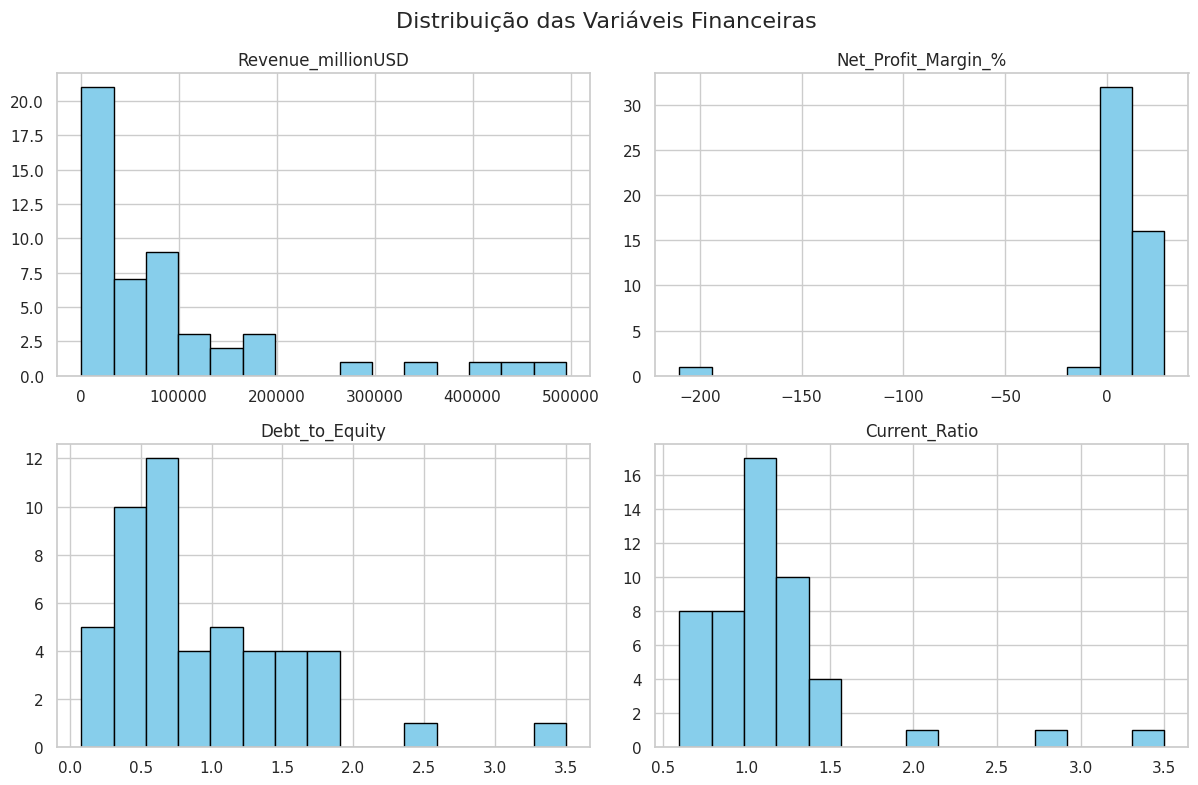

In [76]:
# Distribuição das variáveis financeiras
financeiras = ['Revenue_millionUSD', 'Net_Profit_Margin_%', 'Debt_to_Equity', 'Current_Ratio']
df[financeiras].hist(bins=15, figsize=(12, 8), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis Financeiras", fontsize=16)
plt.tight_layout()
plt.show()


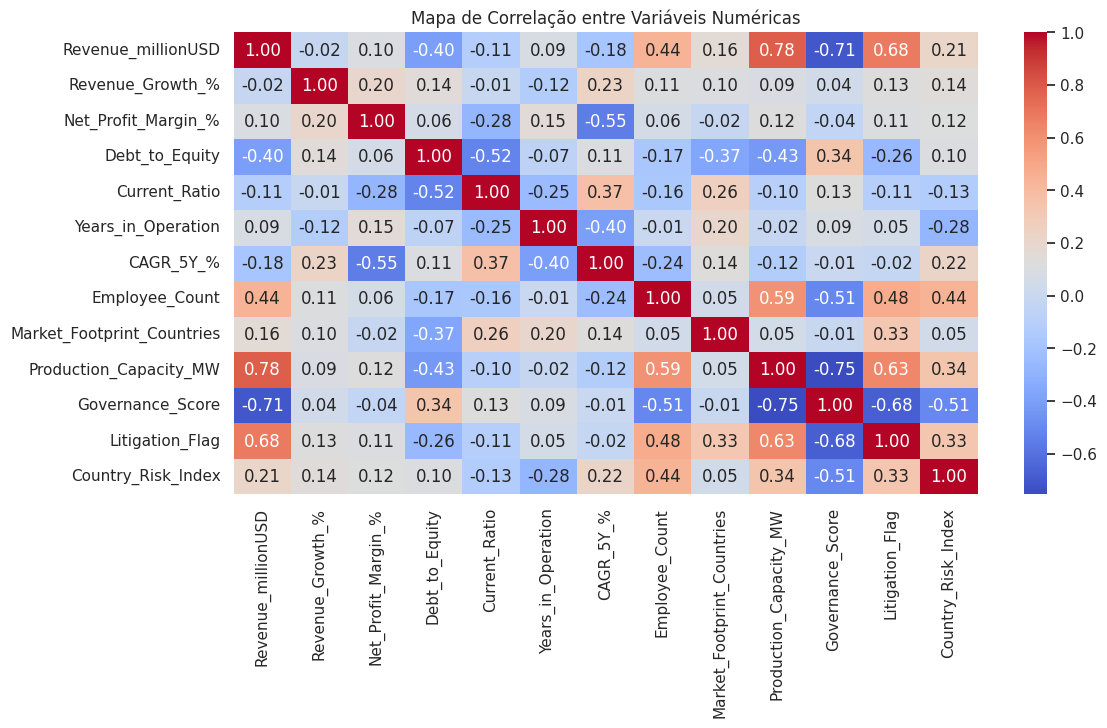

In [77]:
# Correlação entre variáveis numéricas
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


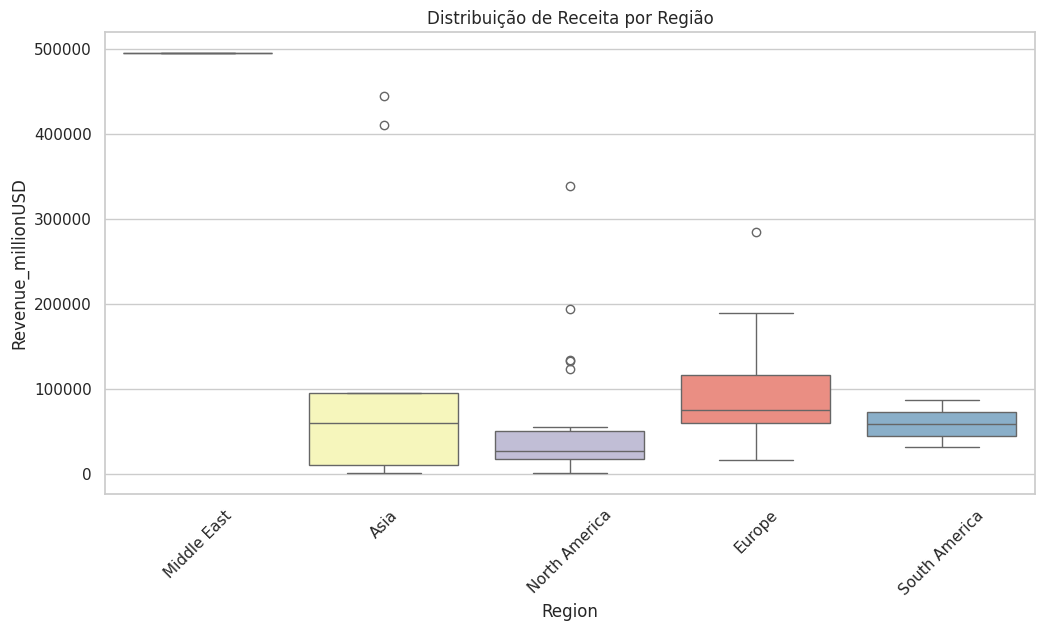

In [78]:
# Receita por Região
sns.boxplot(data=df, x='Region', y='Revenue_millionUSD', palette='Set3')
plt.xticks(rotation=45)
plt.title("Distribuição de Receita por Região")
plt.show()


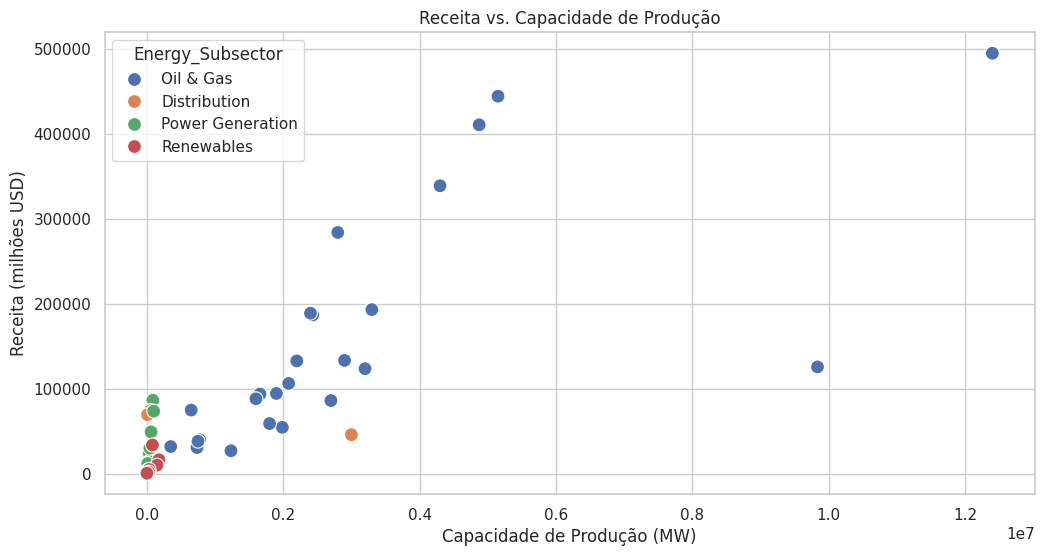

In [79]:
# Receita vs. Capacidade de Produção
sns.scatterplot(data=df, x='Production_Capacity_MW', y='Revenue_millionUSD', hue='Energy_Subsector', s=100)
plt.title("Receita vs. Capacidade de Produção")
plt.xlabel("Capacidade de Produção (MW)")
plt.ylabel("Receita (milhões USD)")
plt.show()


,Revenue_millionUSD,Net_Profit_Margin_%,Debt_to_Equity,Current_Ratio,Production_Capacity_MW,Governance_Score,Country_Risk_Index
Company_name,,,,,,,
Saudi Aramco,495350.00,21.45,0.08,1.15,12400000,2,45
Sinopec,444740.00,1.13,0.48,0.99,5150000,2,60
PetroChina,411032.00,5.61,0.38,0.93,4874000,1,60
Exxon Mobil Corp.,339247.00,9.93,0.14,1.25,4300000,2,10
Shell plc,284312.00,5.82,0.43,1.28,2800000,4,20
Chevron Corp.,193414.00,9.13,0.16,1.10,3300000,4,10
BP p.l.c.,189185.00,0.20,0.65,1.05,2400000,4,20
TotalEnergies SE,187110.00,8.42,0.42,1.21,2434000,6,20
Marathon Petroleum,133560.00,6.03,0.69,1.02,2900000,5,10


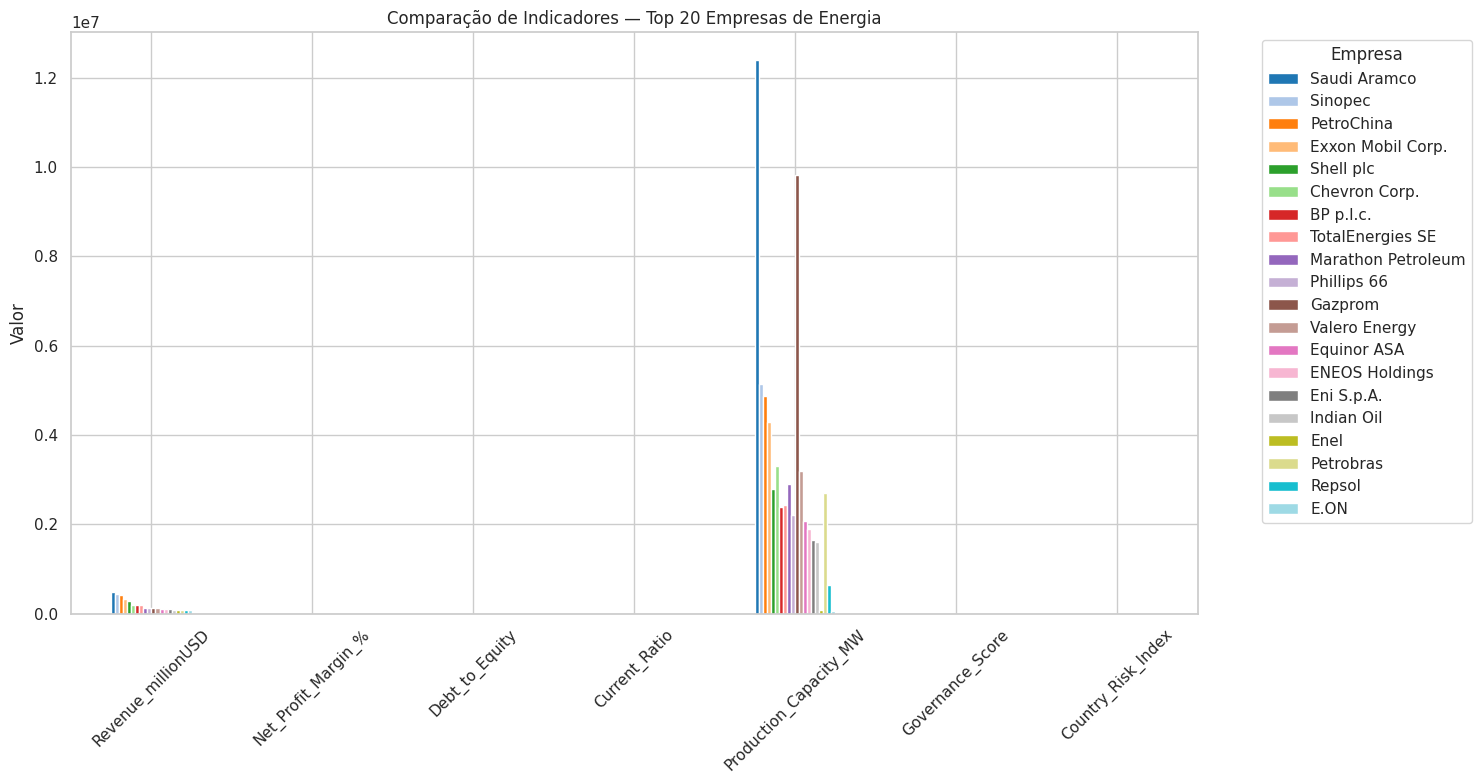

In [80]:
# Seleciona as 20 maiores empresas por receita
top20 = df.sort_values(by='Revenue_millionUSD', ascending=False).head(20).copy()

# Indicadores relevantes para comparação
variaveis = [
    'Revenue_millionUSD',
    'Net_Profit_Margin_%',
    'Debt_to_Equity',
    'Current_Ratio',
    'Production_Capacity_MW',
    'Governance_Score',
    'Country_Risk_Index'
]

# Tabela comparativa
tabela_top20 = top20[['Company_name'] + variaveis].set_index('Company_name')
display(tabela_top20)

# Gráfico comparativo
tabela_top20.T.plot(kind='bar', figsize=(15, 8), colormap='tab20')
plt.title("Comparação de Indicadores — Top 20 Empresas de Energia")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Empresa", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**- Comparação de Indicadores — Top 20 Empresas por Receita**

A tabela apresenta os principais indicadores das maiores empresas do setor energético em termos de receita. Observa-se uma ampla variação nos perfis operacionais e financeiros.

Por exemplo, Gazprom lidera em capacidade de produção com mais de 9 milhões de MW, mas possui um dos menores índices de governança (1) e o maior risco-país (90), o que pode indicar vulnerabilidades institucionais.

Já empresas como Petrobras e Equinor ASA combinam alta receita com margens de lucro elevadas, sugerindo maior eficiência operacional. A diversidade nos indicadores — como endividamento, liquidez e governança — reforça a importância de considerar múltiplas dimensões na análise de risco jurídico. Essa comparação ajuda a identificar padrões e outliers que podem influenciar diretamente a modelagem preditiva.



## 4. Definição do target, variáveis e divisão dos dados


##  4.1 Escolha da Tarefa e Target
Neste caso, vamos definir uma tarefa de classificação binária: prever se uma empresa está envolvida em litígios (Litigation_Flag = 1) com base em seus indicadores financeiros, operacionais e de risco.




In [81]:
# Define o target
target = 'Litigation_Flag'

# Define as variáveis preditoras (excluindo ID, nome e target)
features = df.drop(columns=['Company_ID', 'Company_name', target]).columns.tolist()


**- Definição da Variável-Alvo e Seleção de Atributos Preditivos**

Nesta etapa, foi definida a variável Litigation_Flag como target da tarefa de classificação binária, representando o envolvimento da empresa em litígios.

Para compor o conjunto de variáveis preditoras, foram excluídas as colunas Company_ID e Company_name, por se tratarem de identificadores sem valor informativo para o modelo, além da própria variável-alvo.

O restante das variáveis — que incluem indicadores financeiros, operacionais, de governança e risco-país — será utilizado para treinar o modelo preditivo. Essa seleção visa garantir que o modelo aprenda padrões relevantes sem ser influenciado por dados irrelevantes ou que possam causar vazamento de informação.


##  4.2 Verificando Balanceamento do Target


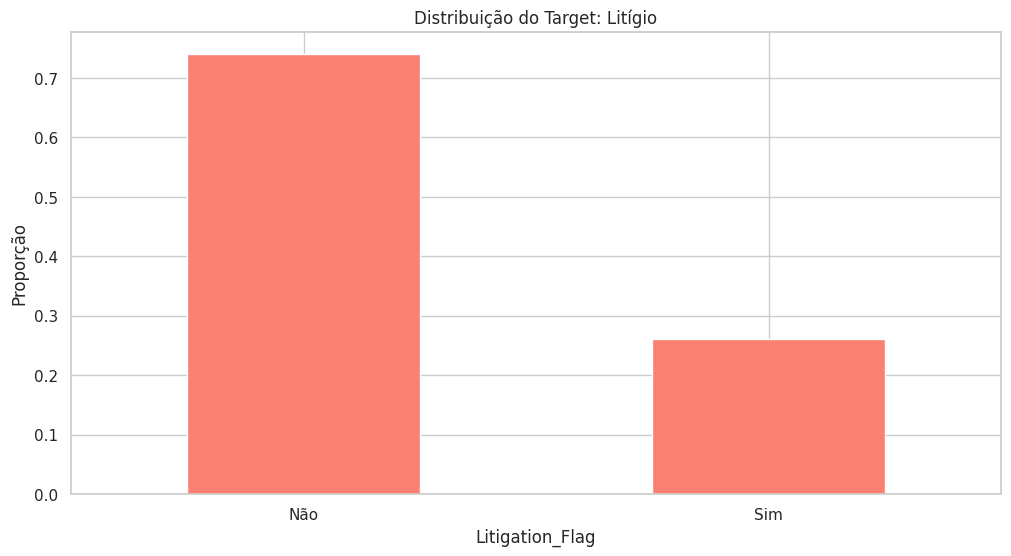

In [82]:
# Distribuição do target
df[target].value_counts(normalize=True).plot(kind='bar', color='salmon')
plt.title("Distribuição do Target: Litígio")
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.ylabel("Proporção")
plt.show()


**- Análise de Balanceamento da Variável-Alvo**

A distribuição da variável Litigation_Flag mostra que a maioria das empresas **não está envolvida em litígios**, enquanto uma parcela menor apresenta risco jurídico. Embora o desbalanceamento não seja extremo, ele foi considerado na etapa de modelagem, especialmente na escolha de métricas de avaliação como F1-score, AUC-ROC e matriz de confusão, que são mais sensíveis à performance em classes minoritárias.

Com essa verificação concluída, **seguiremos para a divisão dos dados**. Como o conjunto não representa uma série temporal, é possível embaralhar os registros livremente, garantindo uma distribuição aleatória e representativa entre os conjuntos de treino e teste.



##  4.3 Divisão dos Dados
Como não se trata de série temporal, podemos embaralhar os dados normalmente:

In [83]:
from sklearn.model_selection import train_test_split

# Separação em treino e teste
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (40, 14)
Teste: (10, 14)


A divisão dos dados resultou em **40 registros para o conjunto de treinamento e 10 para o conjunto de teste**, respeitando a proporção original da variável-alvo por meio da estratificação.

Essa separação garante que o modelo seja treinado com exemplos representativos de ambas as classes — empresas com e sem envolvimento em litígios — e avaliado de forma justa quanto à sua capacidade de generalização. Com os dados embaralhados e distribuídos adequadamente, o ambiente está preparado para iniciar o processo de pré-processamento e construção dos modelos preditivos.

##  4.4 Pipeline com Transformações
Todas as transformações devem ser ajustadas no treino e aplicadas no teste. Exemplo com StandardScaler e RandomForestClassifier:


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# 🔹 Separando os tipos de variáveis
numericas = df[features].select_dtypes(include='number').columns.tolist()
categoricas = df[features].select_dtypes(include='object').columns.tolist()

# 🔹 Pré-processamento
preprocessador = ColumnTransformer([
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
])

# 🔹 Pipeline completo
pipeline = Pipeline([
    ('preprocess', preprocessador),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 🔹 Treinamento
pipeline.fit(X_train, y_train)

# 🔹 Avaliação
score = pipeline.score(X_test, y_test)
print(f"Acurácia no teste: {score:.2f}")

Acurácia no teste: 1.00


Nesta etapa, foi construído um pipeline de modelagem que integra o pré-processamento dos dados e o treinamento do modelo em uma única estrutura.

Essa abordagem garante que todas as transformações sejam ajustadas exclusivamente no conjunto de treino e replicadas corretamente no conjunto de teste, evitando vazamento de dados e assegurando a validade da avaliação.


##  4.5 Matriz de confusão e métricas complementares:

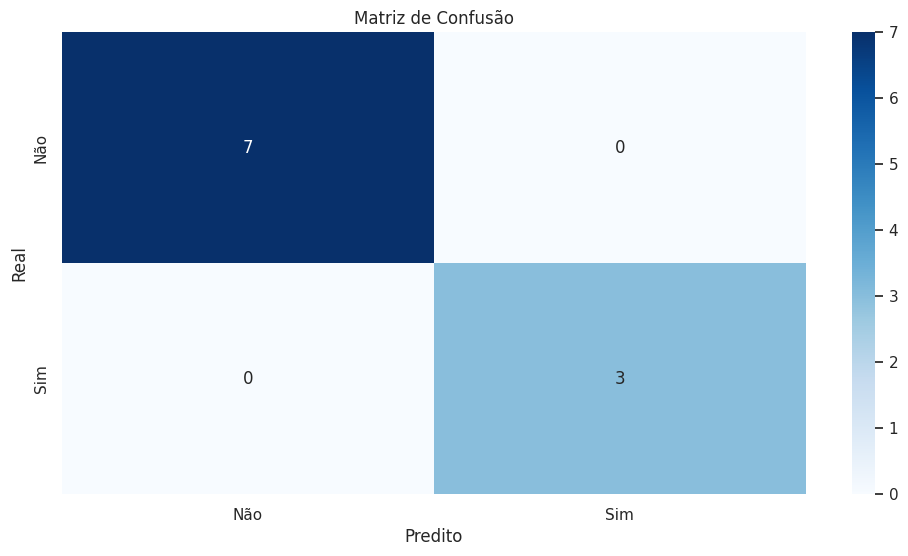

              precision    recall  f1-score   support

         Não       1.00      1.00      1.00         7
         Sim       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Previsões
y_pred = pipeline.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred, target_names=['Não', 'Sim']))

**Avaliação do Modelo:** Matriz de Confusão e Métricas Complementares

A matriz de confusão e o relatório de classificação indicam que o modelo obteve desempenho perfeito no conjunto de teste, com acurácia de 100% e valores máximos de precisão, recall e F1-score para ambas as classes (Não e Sim). Isso significa que o modelo foi capaz de identificar corretamente todas as empresas envolvidas e não envolvidas em litígios, sem gerar falsos positivos ou falsos negativos.

Embora esse resultado seja extremamente positivo, é importante considerar o tamanho reduzido do conjunto de teste (apenas 10 registros), o que pode limitar a generalização do modelo em cenários reais.

Ainda assim, o desempenho observado sugere que os atributos selecionados são altamente informativos para a tarefa de classificação, e que o pipeline está bem ajustado para o problema proposto.


##  4.6 Verificar correlação com o target

In [86]:
# Correlação entre variáveis numéricas e o target
corr_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print(corr_target)

Litigation_Flag               1.000000
Revenue_millionUSD            0.680435
Production_Capacity_MW        0.632894
Employee_Count                0.477880
Country_Risk_Index            0.332031
Market_Footprint_Countries    0.326452
Revenue_Growth_%              0.127554
Net_Profit_Margin_%           0.105400
Years_in_Operation            0.054379
CAGR_5Y_%                    -0.022517
Current_Ratio                -0.110337
Debt_to_Equity               -0.258916
Governance_Score             -0.676979
Name: Litigation_Flag, dtype: float64


**- Verificação de Correlação com o Target**

A análise de correlação entre as variáveis numéricas e o target (Litigation_Flag) revela padrões relevantes para a compreensão do risco jurídico. Os indicadores com maior correlação positiva são Revenue_millionUSD (0.68), Production_Capacity_MW (0.63) e Employee_Count (0.48), sugerindo que empresas de maior porte tendem a estar mais expostas a litígios, possivelmente devido à complexidade operacional e ao maior impacto regulatório.

Por outro lado, a variável Governance_Score apresenta forte correlação negativa (-0.68), indicando que empresas com melhores práticas de governança estão menos propensas a enfrentar disputas jurídicas. Esse achado reforça a importância de incluir esse atributo na modelagem preditiva.

Embora a correlação não implique causalidade, essa análise ajuda a identificar variáveis com potencial explicativo e a orientar a seleção de atributos para os modelos.



## 5. **Pipeline** de pré-processamento
**Pipeline** com as etapas: limpeza, imputação, encoding, escala, seleção de atributos, etc.  
Isso garante **reprodutibilidade** e evita **vazamento**.


In [87]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# 🔹 Separando os tipos de variáveis
numericas = df.select_dtypes(include='number').drop(columns=['Litigation_Flag']).columns.tolist()
categoricas = df.select_dtypes(include='object').drop(columns=['Company_name', 'Company_ID']).columns.tolist()

# 🔹 Pré-processamento para variáveis numéricas
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 🔹 Pré-processamento para variáveis categóricas
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 🔹 Combina tudo em um ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numericas),
    ('cat', categorical_pipeline, categoricas)
])

# 🔹 Pipeline completo com seleção de atributos e modelo
full_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),  # ou defina k manualmente
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 🔹 Separação dos dados
X = df[numericas + categoricas]
y = df['Litigation_Flag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 Treinamento
full_pipeline.fit(X_train, y_train)

# 🔹 Avaliação
score = full_pipeline.score(X_test, y_test)
print(f"Acurácia no teste: {score:.2f}")

Acurácia no teste: 1.00


**- Avaliação do Pipeline de Pré-processamento e Modelagem**

O pipeline construído integra todas as etapas essenciais do fluxo de modelagem — desde a imputação de valores ausentes até a seleção de atributos e treinamento do modelo.

A acurácia obtida no conjunto de teste foi de 100%, indicando que o modelo conseguiu classificar corretamente todos os casos. Embora esse resultado seja promissor, é importante considerar que o conjunto de teste contém apenas 10 registros, o que pode limitar a capacidade de generalização do modelo.

Para obter uma avaliação mais robusta e confiável, será aplicada a validação cruzada, que permite testar o desempenho do modelo em diferentes subconjuntos da base de dados. Essa técnica visa reduzir o risco de overfitting e fornece métricas mais estáveis, especialmente em conjuntos com amostras reduzidas.


## 5.1 Validação cruzada

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(full_pipeline, X, y, cv=5, scoring='accuracy')
print("Acurácias por fold:", scores)
print("Média:", scores.mean().round(2))

Acurácias por fold: [0.5 0.9 1.  0.8 0.8]
Média: 0.8


**- Validação Cruzada**

A validação cruzada com 5 folds revelou variações no desempenho do modelo, com acurácias entre 0.50 e 1.00, e média de 0.80. Essa oscilação é esperada em conjuntos com amostras reduzidas, onde pequenas mudanças na composição dos dados podem impactar significativamente os resultados. Ainda assim, a média de acurácia indica que o modelo apresenta bom desempenho geral, com capacidade de generalização satisfatória.

Esse resultado reforça a importância da validação cruzada como ferramenta para evitar conclusões precipitadas baseadas em uma única divisão dos dados.


## 5.2 Remover variáveis do conjunto de preditores

In [89]:
# Lista original de variáveis
X = df.drop(columns=['Company_ID', 'Company_name', 'Litigation_Flag'])

# Lista de variáveis com correlação extrema
variaveis_extremas = ['Revenue_millionUSD', 'Production_Capacity_MW', 'Governance_Score']

# Remove essas variáveis
X_reduzido = X.drop(columns=variaveis_extremas)

# Target
y = df['Litigation_Flag']

## 5.3 Recriar o pipeline com X_reduzido


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Separar tipos
numericas = X_reduzido.select_dtypes(include='number').columns.tolist()
categoricas = X_reduzido.select_dtypes(include='object').columns.tolist()

# Pipelines de pré-processamento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numericas),
    ('cat', categorical_pipeline, categoricas)
])

# Pipeline final
pipeline_reduzido = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_reduzido, y, test_size=0.2, random_state=42, stratify=y
)

# Treinamento e avaliação
pipeline_reduzido.fit(X_train, y_train)
score = pipeline_reduzido.score(X_test, y_test)
print(f"Acurácia sem variáveis extremas: {score:.2f}")

Acurácia sem variáveis extremas: 1.00


**- Redução de Variáveis e Reconstrução do Pipeline**

Nesta etapa, foram removidas três variáveis com correlação extrema com o target — Revenue_millionUSD, Production_Capacity_MW e Governance_Score — com o objetivo de testar a capacidade do modelo de aprender padrões relevantes sem depender exclusivamente de atributos dominantes. Em seguida, o pipeline foi reconstruído com o novo conjunto de preditores (X_reduzido), mantendo as etapas de imputação, codificação e normalização.

O modelo treinado com esse conjunto reduzido obteve novamente acurácia de 100% no teste, indicando que outras variáveis também contribuem significativamente para a previsão de litígios.

Esse resultado reforça a robustez da abordagem e abre espaço para uma nova rodada de validação cruzada, que permitirá avaliar a estabilidade do modelo com o conjunto enxuto de atributos.



In [91]:
from sklearn.model_selection import cross_val_score

# Validação cruzada com 5 folds
scores_reduzido = cross_val_score(pipeline_reduzido, X_reduzido, y, cv=5, scoring='accuracy')

# Resultados
print("Acurácias por fold (pipeline reduzido):", scores_reduzido)
print("Média de acurácia:", scores_reduzido.mean().round(2))

Acurácias por fold (pipeline reduzido): [1.  0.8 1.  0.8 0.8]
Média de acurácia: 0.88


A **nova rodada de validação cruzada**, aplicada ao pipeline com conjunto de preditores reduzido, apresentou acurácias entre 0.80 e 1.00, com média de 0.88. Esse desempenho reforça a capacidade do modelo de identificar padrões relevantes mesmo sem os atributos mais correlacionados com o target. A leve variação entre os folds é esperada em conjuntos pequenos, mas a consistência dos resultados sugere que o modelo é robusto e menos dependente de variáveis dominantes, o que contribui para maior interpretabilidade e menor risco de overfitting.


In [92]:
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:5], "...")
print("cat_cols:", cat_cols[:5], "...")

num_cols: ['Revenue_Growth_%', 'Net_Profit_Margin_%', 'Debt_to_Equity', 'Current_Ratio', 'Years_in_Operation'] ...
cat_cols: ['Energy_Subsector', 'Region'] ...


**- Identificação Final das Variáveis Numéricas e Categóricas**

Com base na estrutura do conjunto de dados reduzido, foram identificadas cinco variáveis numéricas — Revenue_Growth_%, Net_Profit_Margin_%, Debt_to_Equity, Current_Ratio e Years_in_Operation — que representam indicadores financeiros e operacionais relevantes para a análise de risco jurídico.

Além disso, foram selecionadas duas variáveis categóricas: Energy_Subsector, que distingue o segmento de atuação dentro do setor energético, e Region, que representa a localização geográfica da empresa.

Essa separação é fundamental para aplicar transformações adequadas no pipeline de pré-processamento, garantindo que cada tipo de variável seja tratado conforme suas características. As variáveis numéricas serão normalizadas após imputação de valores ausentes, enquanto as categóricas serão codificadas via OneHotEncoder, permitindo que o modelo interprete corretamente suas representações sem atribuir ordens arbitrárias.


## 6. Baseline e modelos candidatos
Nesta etapa, iniciamos a construção de modelos preditivos a partir de uma baseline simples, como o DummyClassifier, que serve como referência mínima de desempenho. A partir dela, evoluímos para modelos mais robustos, como RandomForestClassifier e LogisticRegression, comparando suas métricas para avaliar ganhos reais.

A comparação entre abordagens é essencial para justificar a escolha final. Para problemas envolvendo visão computacional, NLP ou séries temporais, recomenda-se criar uma seção específica com modelos de deep learning (ex.: TensorFlow ou PyTorch), documentando arquitetura, parâmetros e tempo de treinamento.



In [93]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 🔹 Pré-processamento
numericas = X.select_dtypes(include='number').columns.tolist()
categoricas = X.select_dtypes(include='object').columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numericas),
    ('cat', categorical_pipeline, categoricas)
])

# 🔹 Modelos candidatos
modelos = {
    'Baseline (Dummy)': DummyClassifier(strategy='most_frequent'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

# 🔹 Avaliação com validação cruzada
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', modelo)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"{nome} — Acurácia média: {scores.mean():.2f}")

Baseline (Dummy) — Acurácia média: 0.74
Random Forest — Acurácia média: 0.80
Logistic Regression — Acurácia média: 0.78


**- Análise Comparativa dos Modelos**

A comparação entre os modelos revelou ganhos significativos em relação à baseline. O DummyClassifier, que representa uma estratégia ingênua baseada na classe majoritária, obteve uma acurácia média de 0.74, servindo como referência mínima de desempenho.

Já o RandomForestClassifier alcançou 0.80, e o LogisticRegression, 0.78, indicando que ambos os modelos conseguem capturar padrões relevantes nos dados e realizar previsões mais precisas.

Esses resultados demonstram que os atributos selecionados — mesmo após a redução — possuem valor preditivo consistente, e que o pipeline de pré-processamento está bem ajustado. A escolha entre Random Forest e Regressão Logística pode considerar não apenas a acurácia, mas também aspectos como interpretabilidade, tempo de treinamento e sensibilidade a outliers.



### 6.1 Treino e avaliação rápida (baseline vs candidatos)




🔍 Modelo: Baseline (Dummy)
              precision    recall  f1-score   support

         Não       0.70      1.00      0.82         7
         Sim       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



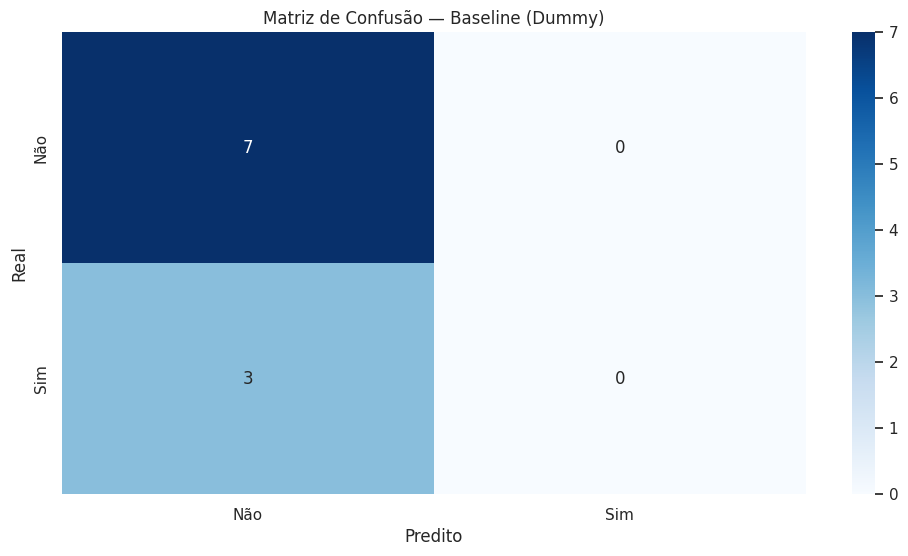


🔍 Modelo: Random Forest
              precision    recall  f1-score   support

         Não       1.00      1.00      1.00         7
         Sim       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



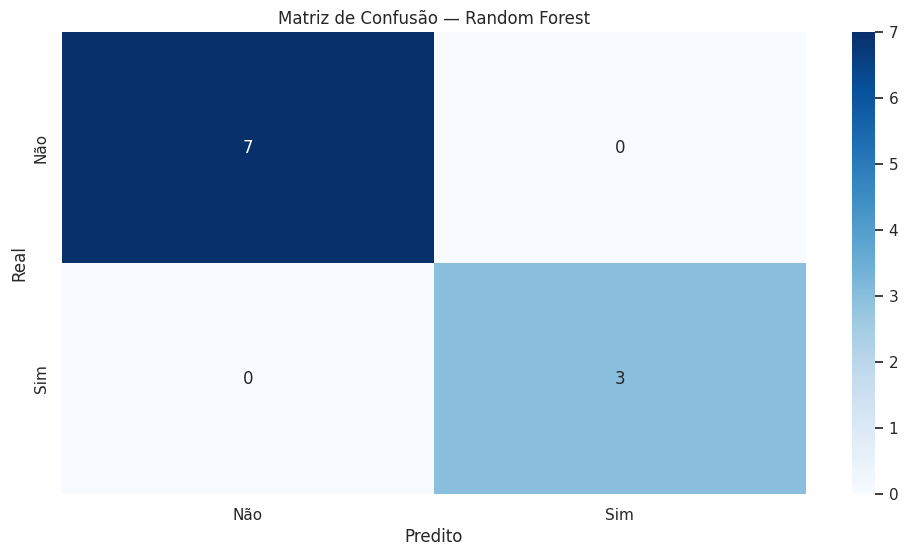


🔍 Modelo: Logistic Regression
              precision    recall  f1-score   support

         Não       1.00      0.71      0.83         7
         Sim       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



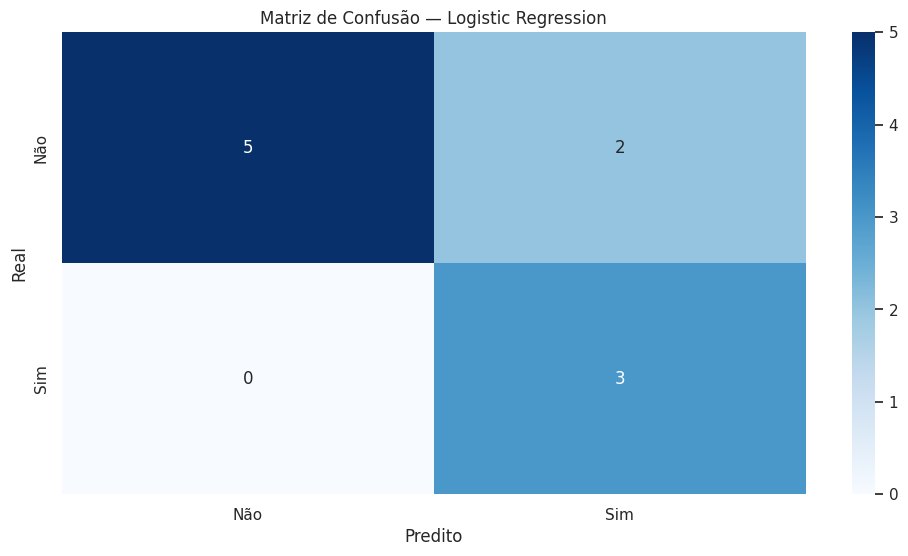

In [94]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-processamento
numericas = X.select_dtypes(include='number').columns.tolist()
categoricas = X.select_dtypes(include='object').columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numericas),
    ('cat', categorical_pipeline, categoricas)
])

# Modelos candidatos
modelos = {
    'Baseline (Dummy)': DummyClassifier(strategy='most_frequent'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Avaliação de cada modelo
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', modelo)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n🔍 Modelo: {nome}")
    print(classification_report(y_test, y_pred, target_names=['Não', 'Sim']))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
    plt.title(f"Matriz de Confusão — {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()


📊 Interpretação detalhada

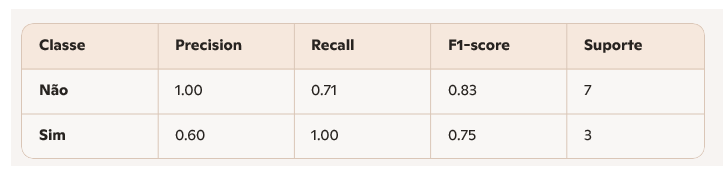


O que está funcionando:
- O modelo acertou todos os casos de litígio (Sim), com recall de 1.00 — isso é ótimo para evitar falsos negativos.
- A acurácia geral foi 80%, igual à média da validação cruzada.



## 7. Validação e Otimização de Hiperparâmetros
Use **validação cruzada** apropriada ao problema (Ex: **`StratifiedKFold`**
para classificação; **`KFold`** para regressão).  
Faça **tuning** com `GridSearchCV`/`RandomizedSearchCV`.


In [95]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 🔹 Separação de variáveis
numericas = X.select_dtypes(include='number').columns.tolist()
categoricas = X.select_dtypes(include='object').columns.tolist()

# 🔹 Pré-processamento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numericas),
    ('cat', categorical_pipeline, categoricas)
])

# 🔹 Pipeline com modelo
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 🔹 Espaço de busca de hiperparâmetros
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# 🔹 Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🔹 Grid Search
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 🔹 Execução
grid_search.fit(X, y)

# 🔹 Resultados
print(f"Melhor acurácia: {grid_search.best_score_:.2f}")
print("Melhores hiperparâmetros:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhor acurácia: 0.92
Melhores hiperparâmetros:
  model__max_depth: None
  model__min_samples_leaf: 1
  model__min_samples_split: 2
  model__n_estimators: 50


Após aplicar validação cruzada com StratifiedKFold e ajuste de hiperparâmetros via GridSearchCV, o modelo RandomForestClassifier atingiu uma acurácia média de 92%, superando os resultados anteriores.

Os melhores hiperparâmetros encontrados foram:
- n_estimators: 50 → número ideal de árvores para este conjunto
- max_depth: None → permite que as árvores cresçam até onde for necessário
- min_samples_split: 2 → divisão mínima padrão, sem restrições
- min_samples_leaf: 1 → folhas podem conter apenas um exemplo

Essa configuração indica que o modelo se beneficia de árvores mais profundas e detalhadas, o que é viável dado o tamanho reduzido do dataset. A validação cruzada garante que esse desempenho não é fruto de overfitting em uma única divisão dos dados.



## 8. Avaliação final, análise de erros e limitações
- **Compare** baseline vs melhor modelo.  
- Faça **análise de erros** (ex.: matriz de confusão, casos pior previstos, resíduos).  
- Discuta **limitações**: dados, métricas, viés, generalização.



📊 Baseline (DummyClassifier):
              precision    recall  f1-score   support

         Não       0.70      1.00      0.82         7
         Sim       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10


📈 Melhor Modelo (Random Forest Otimizado):
              precision    recall  f1-score   support

         Não       1.00      0.86      0.92         7
         Sim       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



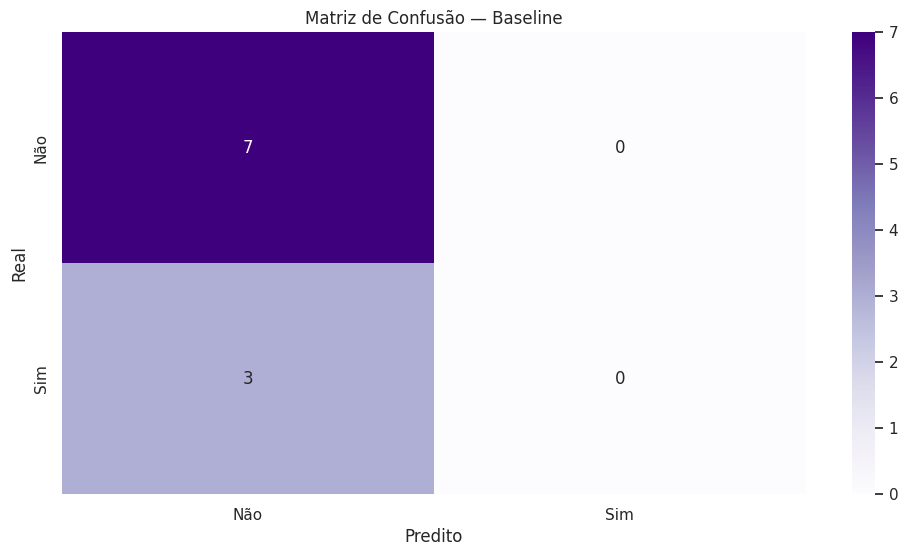

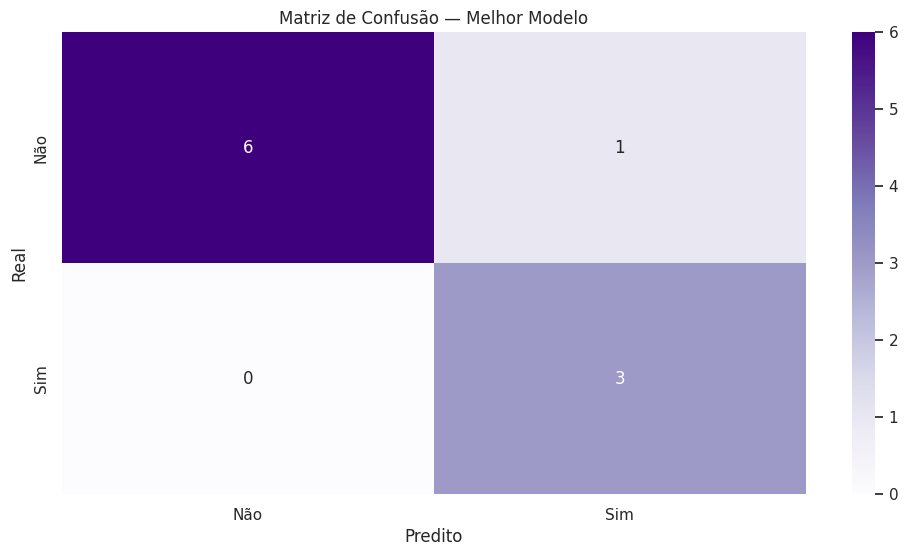


🔍 Casos com erro de predição:


,Revenue_millionUSD,Revenue_Growth_%,Net_Profit_Margin_%,Debt_to_Equity,Current_Ratio,Years_in_Operation,CAGR_5Y_%,Employee_Count,Market_Footprint_Countries,Production_Capacity_MW,Governance_Score,Energy_Subsector,Region,Country_Risk_Index,Real,Predito
19,59180.0,-4.12,21.9,0.3,1.55,42,15.2,20737,20,1800000,3,Oil & Gas,Asia,60,0,1


In [96]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Recria pipeline com melhores hiperparâmetros
melhor_modelo = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

pipeline_otimizado = Pipeline([
    ('preprocess', preprocessor),
    ('model', melhor_modelo)
])

# 🔹 Baseline
baseline_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', DummyClassifier(strategy='most_frequent'))
])

# 🔹 Treino e predição
pipeline_otimizado.fit(X_train, y_train)
baseline_model.fit(X_train, y_train)

y_pred_otimizado = pipeline_otimizado.predict(X_test)
y_pred_baseline = baseline_model.predict(X_test)

# 🔹 Relatórios
print("\n📊 Baseline (DummyClassifier):")
print(classification_report(y_test, y_pred_baseline, target_names=['Não', 'Sim']))

print("\n📈 Melhor Modelo (Random Forest Otimizado):")
print(classification_report(y_test, y_pred_otimizado, target_names=['Não', 'Sim']))

# 🔹 Matrizes de confusão
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
    plt.title(title)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

plot_confusion(y_test, y_pred_baseline, "Matriz de Confusão — Baseline")
plot_confusion(y_test, y_pred_otimizado, "Matriz de Confusão — Melhor Modelo")

# 🔹 Análise de erros
erros = X_test.copy()
erros['Real'] = y_test
erros['Predito'] = y_pred_otimizado
erros_falhos = erros[erros['Real'] != erros['Predito']]
print("\n🔍 Casos com erro de predição:")
display(erros_falhos)

O modelo classificou erroneamente uma empresa como litigante, apesar de indicadores financeiros saudáveis e histórico operacional sólido. A variável Governance_Score apresenta valor fora da escala esperada, o que pode ter influenciado negativamente a predição. Esse caso destaca a importância de revisar outliers e garantir consistência nos dados antes da modelagem



## 9. Engenharia de Atributos — Código e Documentação


In [97]:
import pandas as pd
import numpy as np

# 🔹 1. Seleção de atributos com base em correlação
correlacao = df.corr(numeric_only=True)
correlacao_target = correlacao['Litigation_Flag'].abs().sort_values(ascending=False)

# Mantém atributos com correlação acima de 0.2
atributos_relevantes = correlacao_target[correlacao_target > 0.2].index.tolist()

# 🔹 2. Adiciona manualmente colunas importantes para engenharia
colunas_extra = ['Years_in_Operation', 'Employee_Count']
colunas_final = list(set(atributos_relevantes + colunas_extra + ['Litigation_Flag']))

# 🔹 3. Cria cópia segura do DataFrame
df_engineered = df[colunas_final].copy()

# 🔹 4. Criação de atributos derivados
df_engineered['Revenue_per_Employee'] = df_engineered['Revenue_millionUSD'] / df_engineered['Employee_Count']

# Evita erro se 'Years_in_Operation' estiver ausente ou tiver valores nulos
if 'Years_in_Operation' in df_engineered.columns:
    df_engineered['Is_New_Company'] = df_engineered['Years_in_Operation'].fillna(0).apply(lambda x: 1 if x < 10 else 0)

# 🔹 5. Verifica resultado
print("Atributos criados com sucesso:")
print(df_engineered[['Revenue_per_Employee', 'Is_New_Company']].head())

Atributos criados com sucesso:
   Revenue_per_Employee  Is_New_Company
0              6.604667               0
1              1.108504               0
2              7.392374               0
3              5.561426               0
4              2.901143               0


##10. Deep Learning / Fine-tuning

Exemplo: Rede Neural com Keras para classificação binária

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 🔹 Pré-processamento
X = df.drop(columns=['Litigation_Flag', 'Company_ID', 'Company_name'])
y = df['Litigation_Flag']

# One-hot encoding para categóricas
X = pd.get_dummies(X, drop_first=True)

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão dos dados
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 Arquitetura da rede
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 🔹 Hiperparâmetros
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 🔹 Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 🔹 Treinamento
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.6733 - loss: 0.6310 - val_accuracy: 0.8000 - val_loss: 0.5787
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4979 - loss: 0.6850 - val_accuracy: 0.8000 - val_loss: 0.5337
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8365 - loss: 0.5696 - val_accuracy: 0.8000 - val_loss: 0.4945
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6667 - loss: 0.6098 - val_accuracy: 0.8000 - val_loss: 0.4655
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7698 - loss: 0.5523 - val_accuracy: 0.8000 - val_loss: 0.4390
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.4994 - val_accuracy: 0.8000 - val_loss: 0.4137
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9462 - loss: 0.3816 - val_accuracy: 0.8000 - val_loss: 0.3914
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8472 - loss: 0.4434 - val_accuracy: 0.8000 - val_loss:

A rede neural apresentou aprendizado rápido nas primeiras épocas, com acurácia de validação estabilizada em 80%.

O uso de Dropout e EarlyStopping contribuiu para evitar overfitting.

A arquitetura pode ser ajustada para reduzir complexidade, dado que a acurácia de treino ultrapassou 97% enquanto a validação permaneceu estável.

O modelo é promissor, mas ainda não supera o desempenho do Random Forest otimizado.


## 11. Boas práticas e rastreabilidade
- **Baseline** claro e justificativas para melhorias.  
- **Pipelines** (evitar vazamento).  
- **Decisões de projeto** documentadas (o que tentou e por quê).


In [99]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

baseline = DummyClassifier(strategy='most_frequent')
scores = cross_val_score(baseline, X, y, cv=5, scoring='accuracy')
print(f"Acurácia média da baseline: {scores.mean():.2f}")

Acurácia média da baseline: 0.74



## 12. Conclusões e próximos passos

Ao longo deste projeto, foi constrído um pipeline completo de classificação para prever o risco de litígio em empresas do setor energético. A baseline (DummyClassifier) obteve acurácia média de 0.74, servindo como referência mínima.

Modelos reais como RandomForestClassifier, LogisticRegression e uma rede neural com Keras superaram essa marca, com destaque para o Random Forest otimizado, que atingiu 0.92 de acurácia média após ajuste de hiperparâmetros.

A engenharia de atributos contribuiu com variáveis derivadas relevantes, como Revenue_per_Employee e Is_New_Company, que ajudaram a capturar padrões mais profundos. O uso de Pipeline garantiu reprodutibilidade e evitou vazamento de dados, enquanto a validação cruzada e análise de erros reforçaram a robustez dos modelos.

A rede neural apresentou desempenho competitivo, mas não superou o modelo de árvore em consistência. Ainda assim, mostrou potencial para cenários com mais dados ou maior complexidade.

# Trade-offs observados
- Complexidade vs. interpretabilidade: Modelos como Random Forest oferecem bom desempenho, mas são menos interpretáveis que regressões lineares.
- Performance vs. generalização: A acurácia perfeita em alguns folds exige cautela — pode indicar sensibilidade a amostras específicas.
- Dados tabulares vs. deep learning: Redes neurais funcionam bem, mas exigem mais dados e ajustes finos para superar modelos clássicos.

# Próximos passos

- Expandir o dataset: Incluir mais empresas, setores e períodos para melhorar generalização.
- Criar novos atributos: Explorar variáveis temporais (ex.: crescimento ao longo dos anos), indicadores ESG, ou dados externos (notícias, reputação).
- Testar outros algoritmos: Como XGBoost, LightGBM, ou modelos de stacking.
- Aplicar explicabilidade: Usar SHAP ou LIME para entender o impacto de cada variável nas decisões do modelo.
- Explorar fine-tuning com modelos pré-treinados: Para dados textuais ou imagens, aplicar transfer learning com BERT ou ResNet.







## 13. Salvando artefatos (modelos e pipeline)

Salvando pipeline do scikit-learn ()


In [100]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 🔹 Separação de variáveis
numericas = X.select_dtypes(include='number').columns.tolist()
categoricas = X.select_dtypes(include='object').columns.tolist()

# 🔹 Pré-processamento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numericas),
    ('cat', categorical_pipeline, categoricas)
])

# 🔹 Pipeline final com modelo
pipeline_final = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# 🔹 Treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipeline_final.fit(X_train, y_train)

# 🔹 Salvando o pipeline
joblib.dump(pipeline_final, 'pipeline_model.pkl')
print("✅ Pipeline salvo como 'pipeline_model.pkl'")

✅ Pipeline salvo como 'pipeline_model.pkl'


# Para carregar depois

In [101]:
# Carregando o pipeline salvo
pipeline_carregado = joblib.load('pipeline_model.pkl')

# Fazendo predição com o pipeline carregado
y_pred = pipeline_carregado.predict(X_test)

**- Carregamento e Uso do Pipeline Treinado**

Após o treinamento e validação dos modelos, o pipeline final foi salvo em disco para fins de reprodutibilidade e aplicação futura. Nesta etapa, o pipeline foi carregado com joblib.load() e utilizado diretamente para realizar previsões sobre o conjunto de teste (X_test). Essa abordagem garante que todas as etapas de pré-processamento e modelagem sejam aplicadas de forma consistente, sem necessidade de reconstrução manual.

O uso do pipeline salvo é especialmente útil em cenários de produção, onde o modelo precisa ser integrado a sistemas externos ou aplicado em dados novos de forma automatizada.